In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,employer_provided,min_salary,max_salary,company_txt,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,53.0,91,Tecolote Research\n,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,63.0,112,University of Maryland Medical System\n,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,80.0,90,KnowBe4\n,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,56.0,97,PNNL\n,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,86.0,143,Affinity Solutions\n,22,1,0,0,0,1


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'company_txt', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    358
na                238
data engineer     158
analyst           124
manager            36
mle                26
director           16
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        688
senior    266
jr          2
Name: seniority, dtype: int64

In [7]:
#Competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [8]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
954                                     IGNW
955             Riverside Research Institute
Name: company_txt, Length: 956, dtype: object

In [9]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,age,python_yn,R_yn,spark,aws,excel,num_competitors
count,956.000000,956.000000,956.000000,956.000000,742.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,3.601255,1774.605649,0.025105,0.017782,74.068733,98.937238,40.233264,0.518828,0.002092,0.223849,0.253138,0.508368,0.921548
std,1.067619,598.942517,0.156525,0.132229,31.869282,66.907440,50.337073,0.499907,0.045715,0.417040,0.435037,0.500192,1.333859
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1937.000000,0.000000,0.000000,52.000000,45.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,1992.000000,0.000000,0.000000,69.500000,110.000000,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.200000,2008.000000,0.000000,0.000000,91.000000,143.000000,52.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'company_txt', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'num_competitors'],
      dtype='object')

<Axes: >

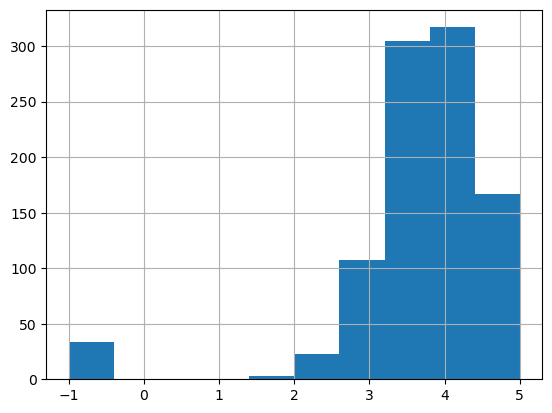

In [11]:
df.Rating.hist()

<Axes: >

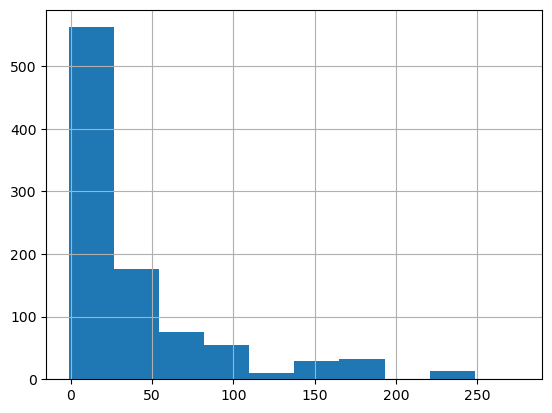

In [13]:
df.age.hist()

<Axes: >

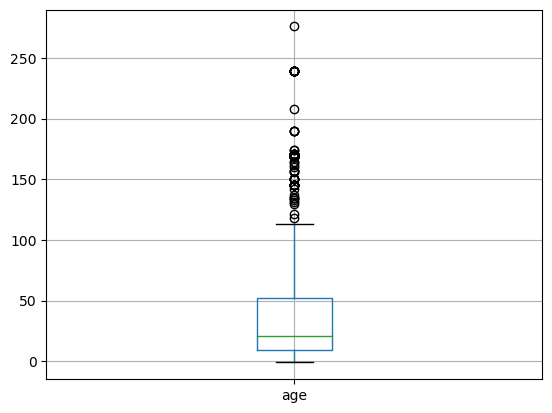

In [14]:
df.boxplot(column = ['age'])

<Axes: >

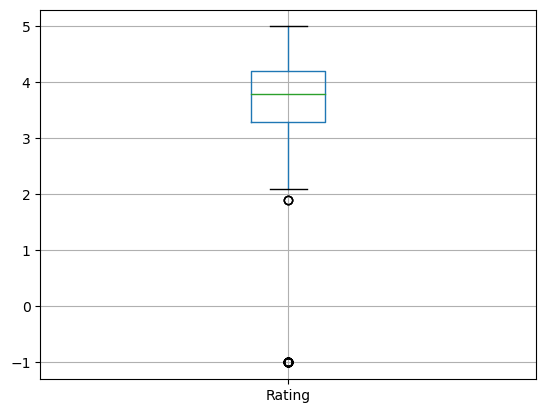

In [15]:
df.boxplot(column = 'Rating')

In [19]:
df[['age','Rating','num_competitors','min_salary','max_salary']].corr()

,age,Rating,num_competitors,min_salary,max_salary
age,1.000000,0.041721,0.174599,0.001705,0.203343
Rating,0.041721,1.000000,0.030364,-0.007825,0.035469
num_competitors,0.174599,0.030364,1.000000,0.086887,0.199818
min_salary,0.001705,-0.007825,0.086887,1.000000,0.944186
max_salary,0.203343,0.035469,0.199818,0.944186,1.000000


<Axes: >

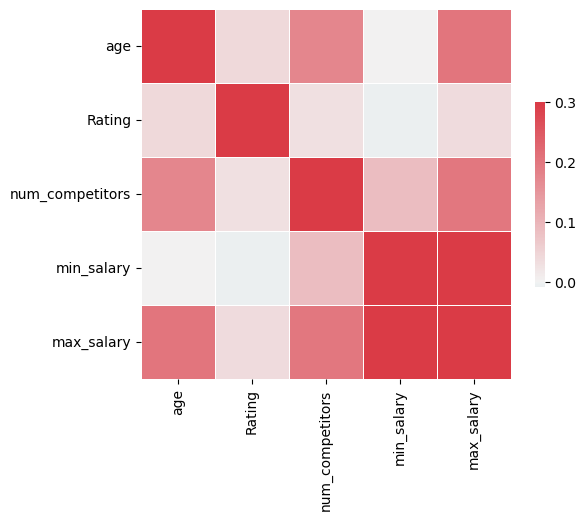

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','Rating','num_competitors','min_salary','max_salary']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for Size: total = 9


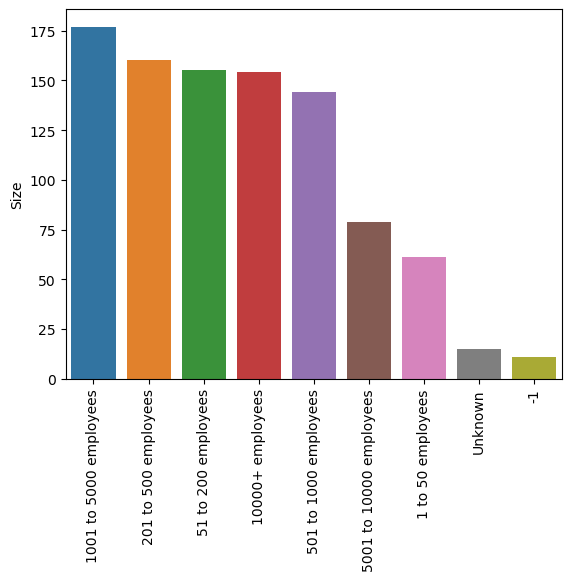

graph for Type of ownership: total = 13


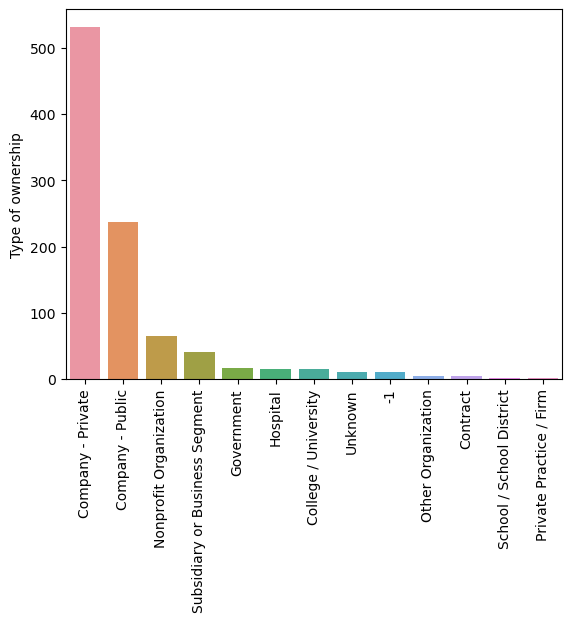

graph for Industry: total = 63


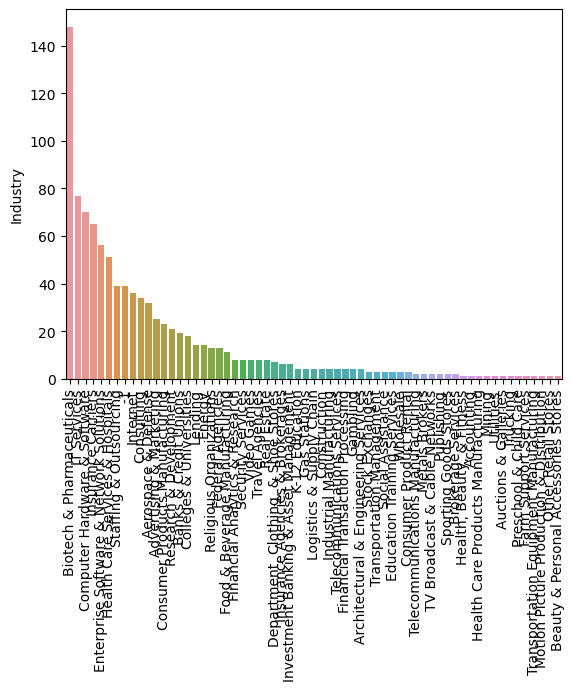

graph for Sector: total = 25


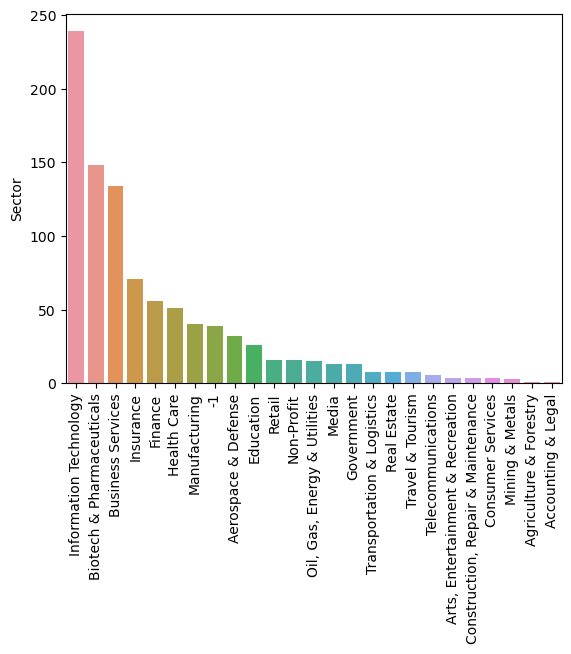

graph for Revenue: total = 14


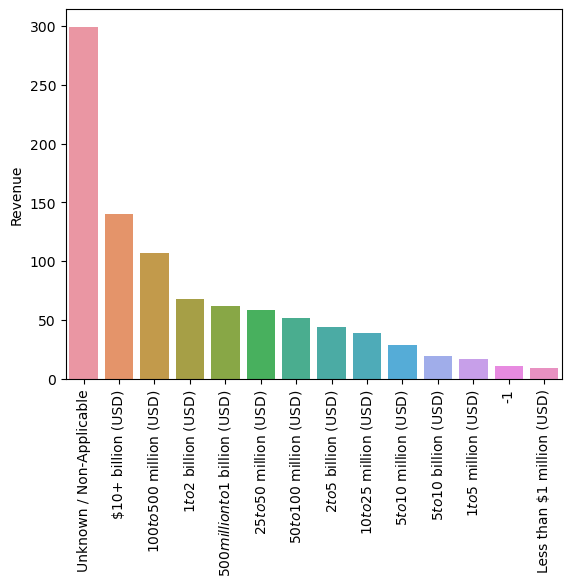

graph for python_yn: total = 2


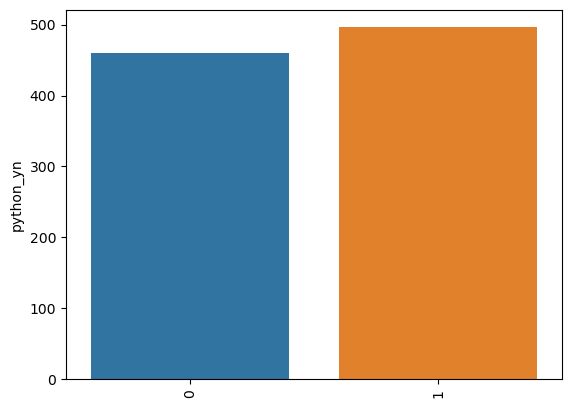

graph for R_yn: total = 2


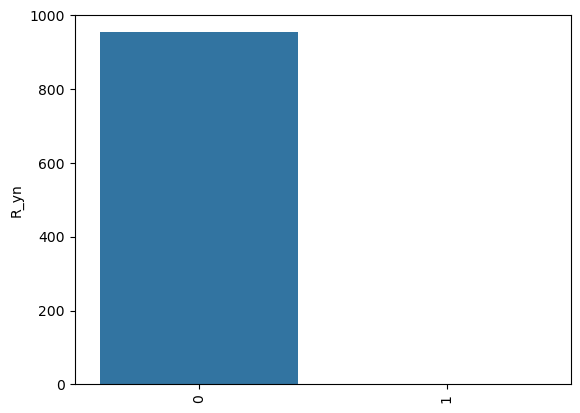

graph for spark: total = 2


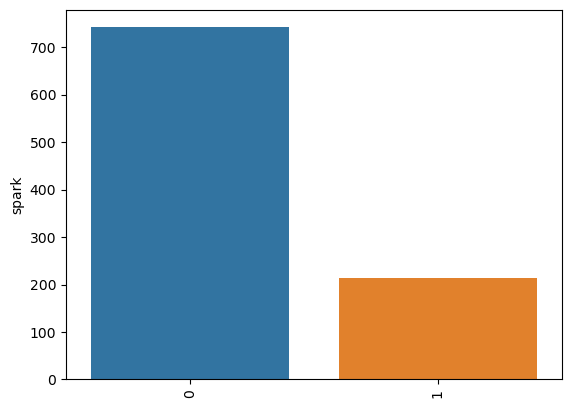

graph for aws: total = 2


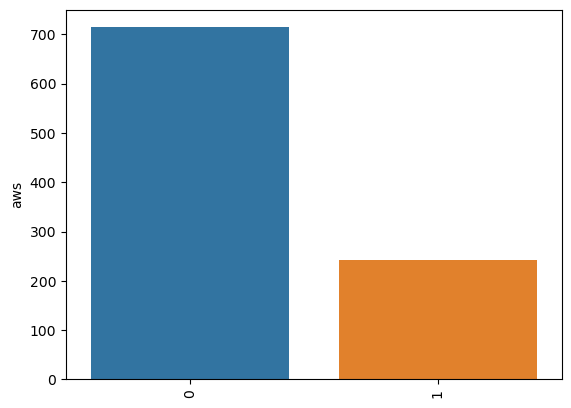

graph for excel: total = 2


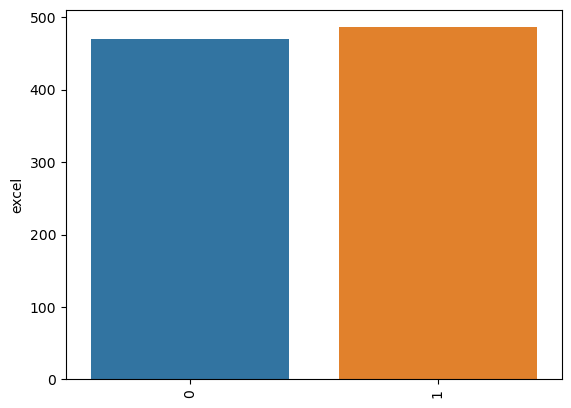

graph for job_simp: total = 7


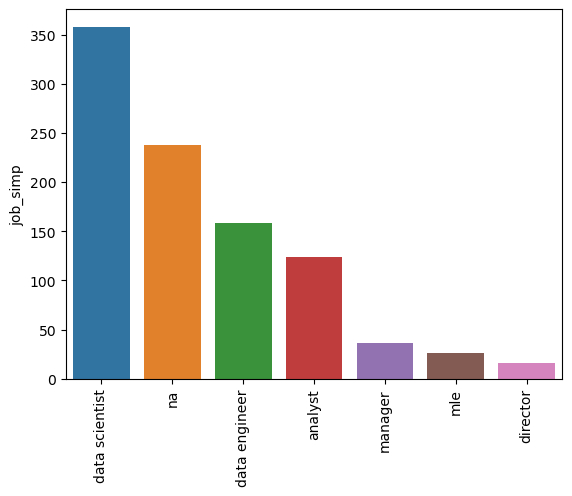

graph for seniority: total = 3


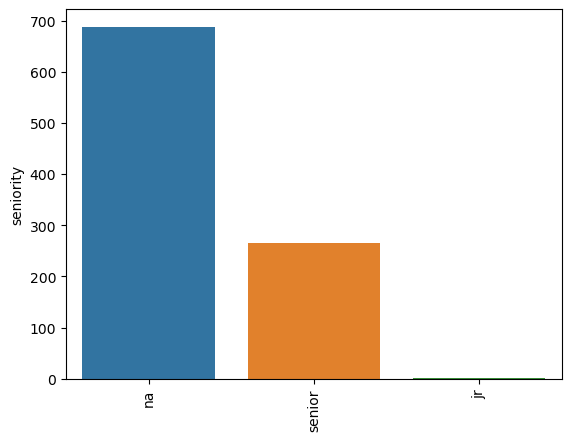

In [21]:
df_cat = df[['Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [24]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = ['min_salary','max_salary'])

max_salary  min_salary
job_simp       seniority                        
analyst        jr          76.000000   37.000000
               na          61.104167   43.337838
               senior     101.407407   56.777778
data engineer  na          90.876106   68.548780
               senior     128.755556   93.000000
data scientist jr         132.000000   81.000000
               na         100.473684   80.989247
               senior     142.309091  107.956522
director       na         208.214286  129.000000
               senior       1.000000         NaN
manager        na          69.485714   58.090909
               senior       1.000000         NaN
mle            na         120.526316   85.866667
               senior     184.142857  100.000000
na             na          74.682927   51.826772
               senior     108.932432   77.000000

In [26]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = ['min_salary','max_salary']).sort_values(['min_salary','max_salary'])

,max_salary,min_salary
Location,,
"Port Washington, NY",16.000000,15.0
"Bedford, MA",89.000000,50.0
"Phoenix, AZ",30.000000,51.0
"Baltimore, MD",93.000000,54.0
"Albuquerque, NM",93.666667,55.0
...,...,...
"Piscataway, NJ",1.000000,NaN
"Richmond, VA",1.000000,NaN
"Sandy, UT",1.000000,NaN
